In [1]:
%matplotlib inline
%pwd

'/home/gabe/work/fast-ai/old/lesson1/nbs'

In [169]:
%%html
<style>
  .end_space {
      min-height: 1000px;
  }
</style

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.random.random((30,2))
y = np.dot(x, [2.0,3.0]) + 1

print(x[:5], x.shape)
print(y[:5], y.shape)


[[ 0.30595285  0.59144791]
 [ 0.23732914  0.02802671]
 [ 0.16408685  0.37904039]
 [ 0.83340457  0.84060276]
 [ 0.63447685  0.2997786 ]] (30, 2)
[ 3.38624944  1.5587384   2.46529488  5.18861741  3.16828948] (30,)


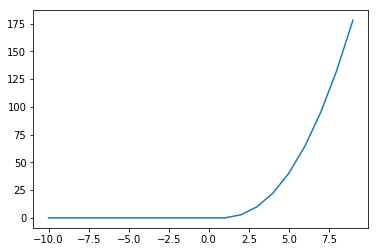

In [47]:
z = np.array(range(-10,10))
plt.plot(z, np.array([np.log(max(1,i)) * i * max(2,i) for i in z]))

In [5]:
import keras
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers.core import Flatten, Dense, Dropout, Lambda

Using TensorFlow backend.


In [6]:
lm = Sequential([Dense(1, input_shape=(2,))])
lm.compile(optimizer=SGD(lr=0.1), loss='mse')

In [7]:
lm.evaluate(x,y)

30/30 [==============================] - 0s


14.10202693939209

In [8]:
lm.fit(x, y, epochs=5, batch_size=1)

Epoch 1/5
30/30 [==============================] - 0s - loss: 1.2342     
Epoch 2/5
30/30 [==============================] - 0s - loss: 0.1261     
Epoch 3/5
30/30 [==============================] - 0s - loss: 0.0558       
Epoch 4/5
30/30 [==============================] - 0s - loss: 0.0258       
Epoch 5/5
30/30 [==============================] - 0s - loss: 0.0129     


In [10]:
lm.get_weights()

In [22]:
lm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [21]:
from sklearn.preprocessing import OneHotEncoder

def onehot(x):
    return np.array(OneHotEncoder().fit_transform(x.reshape(-1,1)).todense())

ox = onehot(np.array(range(0,5)))

print(ox)

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


### [Numpy tutorial](https://www.python-course.eu/numpy_numerical_operations_on_numpy_arrays.php)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 1.  0.  0.  0.]
 [ 0.  2.  0.  0.]
 [ 0.  0.  3.  0.]
 [ 0.  0.  0.  4.]]
[  0   1   4   9  16  25  36  49  64  81 100 121]
[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33]
C [[100 101 102]
 [103 104 105]
 [106 107 108]
 [109 110 111]]
B x C [[ 642  648  654]
 [2314 2336 2358]
 [3986 4024 4062]]
B x C[1,2] 2358


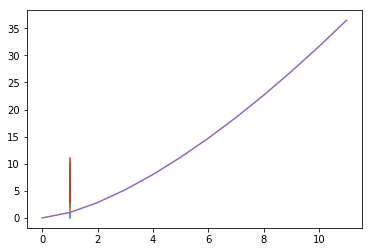

In [64]:
import numpy as np
import matplotlib.pyplot as plt

A = np.arange(12)
B = A.reshape(3,4)

print(A)
print(B)

np.may_share_memory(A, B)

print(A.data)
print(B.data)

plt.plot(np.ones_like(B),B)

np.ones_like(B)
print(np.eye(4, k=0).T * np.arange(1,5))

print(A ** 2)
print((A * 3).tolist())

plt.plot(A, A ** 1.5)

C = np.arange(100,112).reshape(4,3)

print('C',C)
print('B x C', np.dot(B,C))
print('B x C[1,2]', np.dot(B,C)[1,2])

In [54]:
V = np.random.randint(0,100,1000)

%timeit V + 1

872 ns ± 10.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Numpy Matrices

In [75]:
MA = np.mat(np.arange(12).reshape(3,4))
MB = np.mat(np.arange(2,10).reshape(4,2))

print(MA)
print(MB)
print(MB.T)
print('MA x MB')
print(MA * MB)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[2 3]
 [4 5]
 [6 7]
 [8 9]]
[[2 4 6 8]
 [3 5 7 9]]
MA x MB
[[ 40  46]
 [120 142]
 [200 238]]


### Broadcasting

In [73]:
A = np.array([ [11, 12, 13], [21, 22, 23], [31, 32, 33] ])
B = np.array([1, 2, 3])

print(A * B)
print(A + B)

[[11 24 39]
 [21 44 69]
 [31 64 99]]
[[12 14 16]
 [22 24 26]
 [32 34 36]]


In [135]:
# x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
x = np.arange(1,13).reshape(4,3)
v = np.array([1, 0, 1])
vv = np.tile(v, (4, 1)) 

print(vv, 'vv')
print(x, 'x')
print(x + vv, 'x + vv')
print(x + v, 'x + v')
print(x + v == x + vv)

print(x, 'x')
print(np.sum(x, axis=0), 'x: sum of columns')
print(np.sum(x, axis=1)[:, np.newaxis], 'x: sum of rows')
print(x.flatten(), 'x flattened')

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]] vv
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]] x
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]] x + vv
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]] x + v
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]] x
[22 26 30] x: sum of columns
[[ 6]
 [15]
 [24]
 [33]] x: sum of rows
[ 1  2  3  4  5  6  7  8  9 10 11 12] x flattened


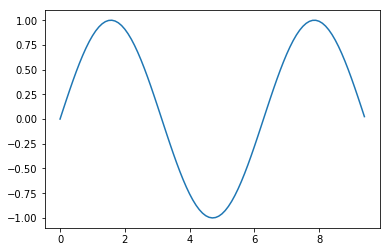

In [99]:
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

plt.plot(x,y)

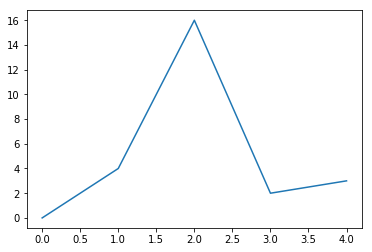

In [109]:
x = range(5)
y = [k ** 2 for k in x if k % 2 == 0] + [2,3]
plt.plot(x,y)

In [131]:
Z = np.arange(24).reshape((3,4,2))

print(Z, 'Z')

[[[ 0  1]
  [ 2  3]
  [ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]
  [12 13]
  [14 15]]

 [[16 17]
  [18 19]
  [20 21]
  [22 23]]] Z


In [138]:
x = np.array([[1,2],[3,4]])
y = np.tile(x, (3,4))

print(x,'x')
print(y,'x tiled (3 rows, 4 columns)')

[[1 2]
 [3 4]] x
[[1 2 1 2 1 2 1 2]
 [3 4 3 4 3 4 3 4]
 [1 2 1 2 1 2 1 2]
 [3 4 3 4 3 4 3 4]
 [1 2 1 2 1 2 1 2]
 [3 4 3 4 3 4 3 4]] x tiled (3 rows, 4 columns)


[ 0.55258421  0.45479803  0.47367605  0.79196238  0.78593369  0.079766
  0.995001    0.70012173  0.23454323  0.62004447]
5.68843079625


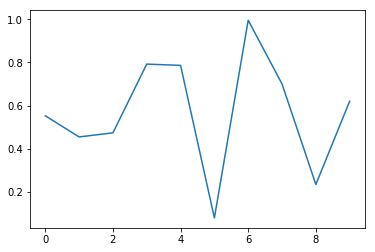

In [159]:
rx = np.random.random(10)
print(rx)
print(np.sum(rx))

plt.plot(rx)

### Symbolic differentiation with sympy

In [161]:
import sympy as sp

x = sp.var('x')

pow(2 * x, 2).diff()

8*x

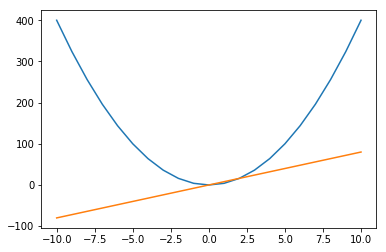

In [166]:
X = np.arange(-10,11)
Y = (2 * X) ** 2

plt.plot(X,Y)
plt.plot(X, X * 8)

In [5]:
list(range(10))[2:3]

[2]

In [8]:
from pathlib import PurePath

p1 = PurePath('/a/b/c/d.txt')

str(p1)

'/a/b/c/d.txt'